In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r'D:\Downloadd\Harshada\DATA\Heart (1).csv')
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
df.info()
print('shape of data:',df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB
shape of data: (303, 15)


In [4]:
# Label Dependent-variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['AHD']=le.fit_transform(df['AHD'])

data=df[['Age','Sex','RestBP','Chol','MaxHR','AHD']]
data.head()

,Age,Sex,RestBP,Chol,MaxHR,AHD
0,63,1,145,233,150,0
1,67,1,160,286,108,1
2,67,1,120,229,129,1
3,37,1,130,250,187,0
4,41,0,130,204,172,0


Text(0.5, 1.0, 'Correlation Matrix')

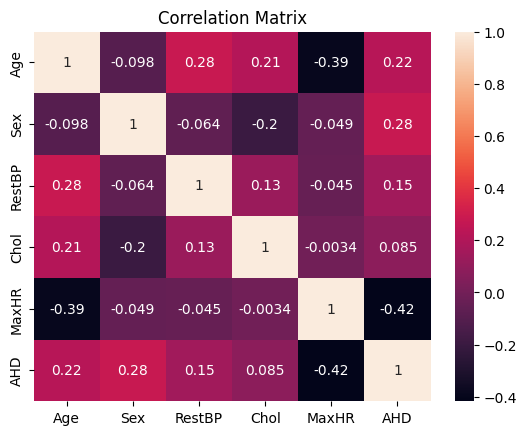

In [5]:
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation Matrix')

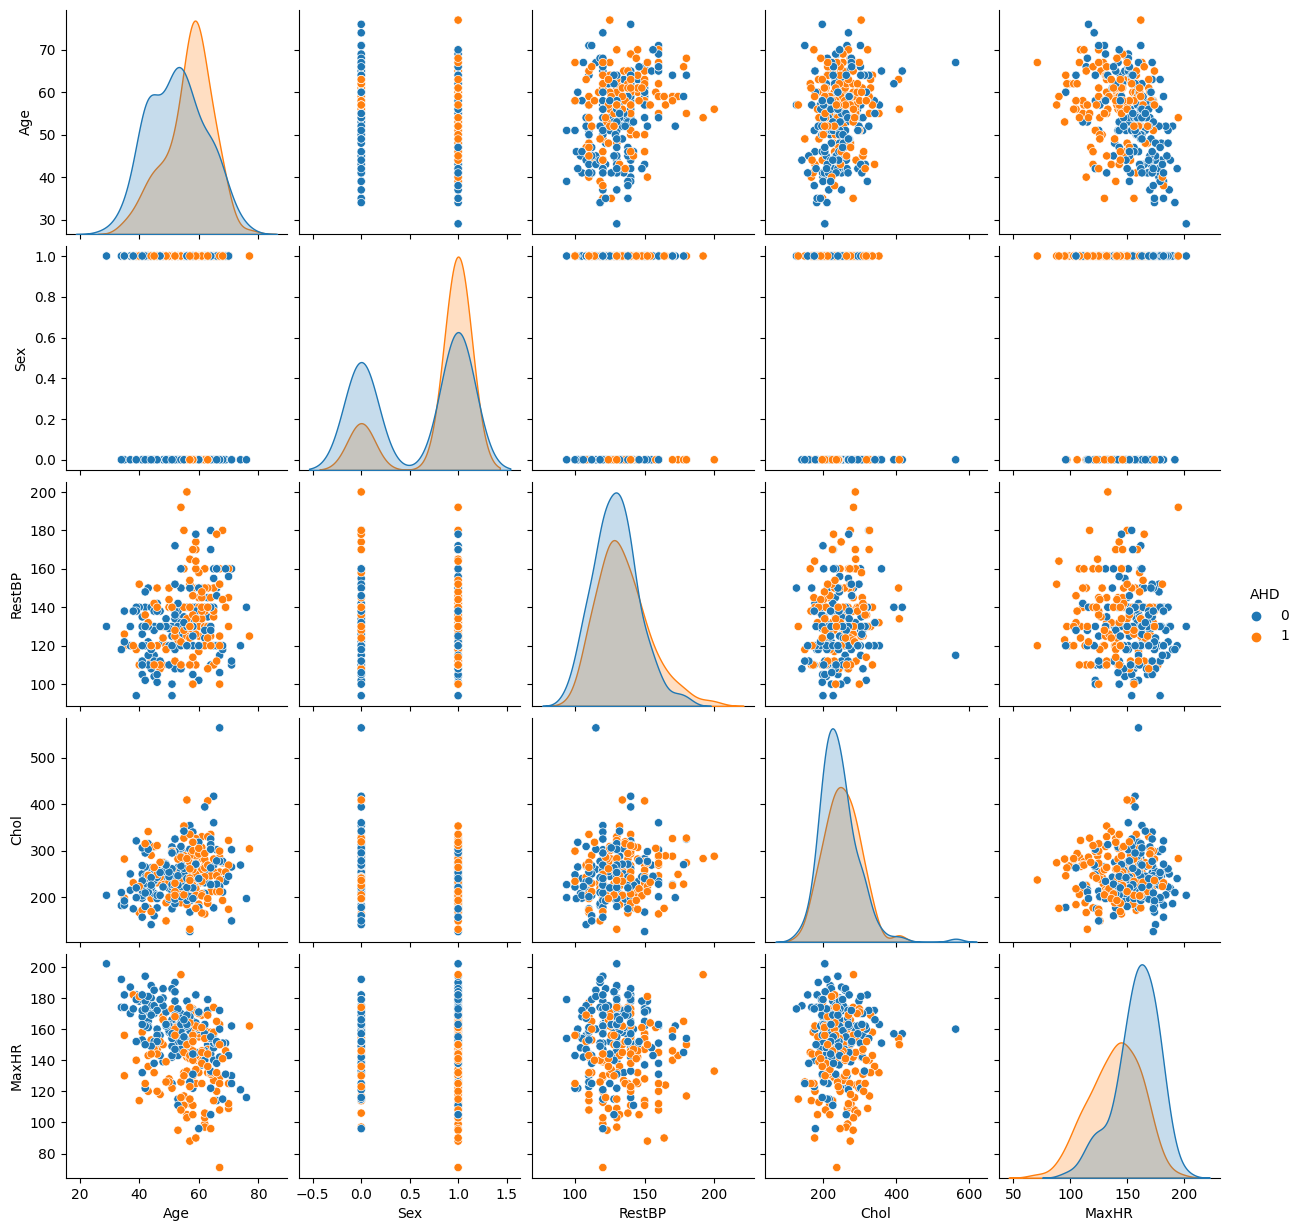

In [6]:
sns.pairplot(data,hue='AHD')

* Data Spliting

In [7]:
x=data[['Age','Sex','RestBP','Chol','MaxHR']]
y=data.AHD

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)

from sklearn.preprocessing  import StandardScaler
scale=StandardScaler()
x_scale_train=scale.fit_transform(x_train)
x_scale_test=scale.fit_transform(x_test)

In [8]:
x_train.shape ,y_train.shape

((272, 5), (272,))

# Logistic Regression

By incrasing training size

Intercept: [0.0935658]
coefficient: [[ 0.01811028  1.64097298  0.01830646  0.00611179 -0.04184049]]
----------------------------------------------------------------------------------------------------
model accuracy 0.7419354838709677
Recall Score 0.8461538461538461
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        18
           1       0.65      0.85      0.73        13

    accuracy                           0.74        31
   macro avg       0.75      0.76      0.74        31
weighted avg       0.77      0.74      0.74        31

----------------------------------------------------------------------------------------------------


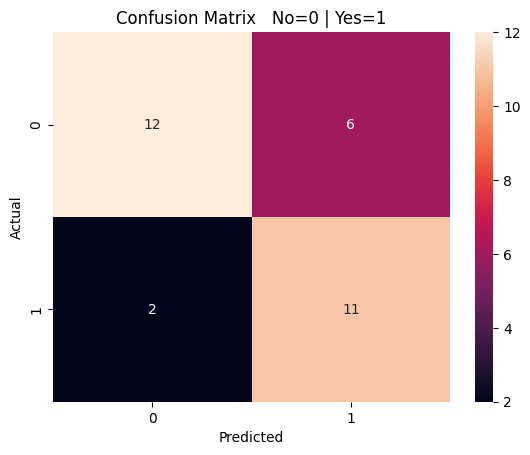

In [9]:

from sklearn.linear_model import LogisticRegression
from  sklearn.metrics import classification_report,accuracy_score,r2_score,confusion_matrix,recall_score
logistic=LogisticRegression()
model=logistic.fit(x_train,y_train)

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test,model.predict(x_test)),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix   No=0 | Yes=1')

print('Intercept:',model.intercept_)
print('coefficient:',model.coef_)
print("-"*100)
print('model accuracy',accuracy_score(y_test,model.predict(x_test)))
print('Recall Score',recall_score(y_test,model.predict(x_test)))
print("-"*100)
print(classification_report(y_test,model.predict(x_test)))
print("-"*100)

* Patients actual not having heart diseases but model predicted heart diseases : 6 (FP)-Type-I error
* Patients actual having heart diseases but model predicted they don't have heart diseases : 2 (FN)-Type-II error
* So, In this case Type-II error is more dangerous

* On scaling data

Intercept: [-0.18243921]
coefficient: [[ 0.13885536  0.81194403  0.29517356  0.31070506 -0.98009524]]
----------------------------------------------------------------------------------------------------
model accuracy 0.8064516129032258
Recall Score 0.7692307692307693
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.77      0.77      0.77        13

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31

----------------------------------------------------------------------------------------------------


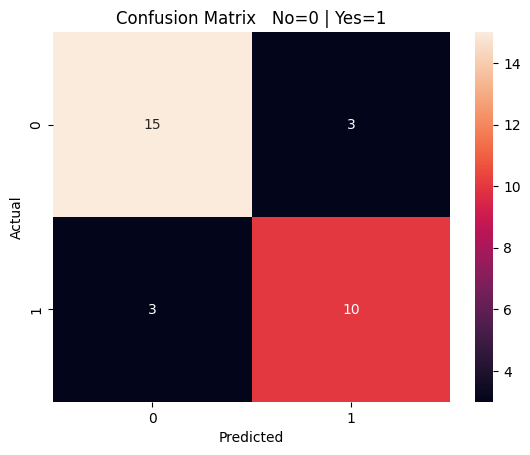

In [10]:
from sklearn.linear_model import LogisticRegression
from  sklearn.metrics import classification_report,accuracy_score,r2_score,confusion_matrix,recall_score
logistic=LogisticRegression()
model1=logistic.fit(x_scale_train,y_train)

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test,model1.predict(x_scale_test)),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix   No=0 | Yes=1')

print('Intercept:',model1.intercept_)
print('coefficient:',model1.coef_)
print("-"*100)
print('model accuracy',accuracy_score(y_test,model1.predict(x_scale_test)))
print('Recall Score',recall_score(y_test,model1.predict(x_scale_test)))
print("-"*100)
print(classification_report(y_test,model1.predict(x_scale_test)))
print("-"*100)


* Patients actual not having heart diseases but model predicted heart diseases : 3 (FP)-Type-I error
* Patients actual having heart diseases but model predicted they don't have heart diseases : 3 (FN)-Type-II error
* So, In this case Type-II error is more dangerous

** Form both models (Scaled and unscaled ) we prefer unscaled model having less Type-II error and greater accuracy score

# Sigmoid Curve

<AxesSubplot: ylabel='AHD'>

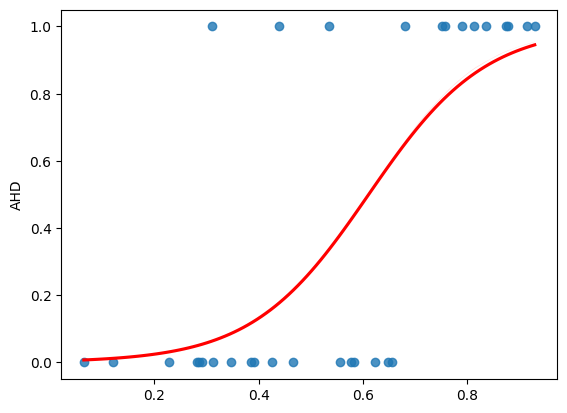

In [41]:
y_pred_prob=model.predict_proba(x_test)[::,1]

sns.regplot(y_pred_prob,y_test,logistic=True,ci=True,
            line_kws={'color':'red'})

#  ROC Curve

* Receiver Operator Characteristic (ROC)
* Area Under the Curve (AUC)

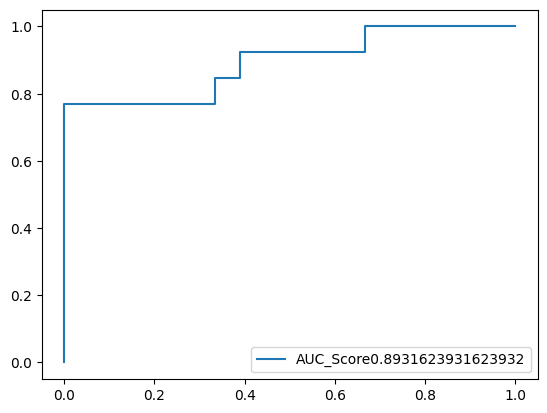

In [42]:
import sklearn.metrics as sm

y_pred_prob=model.predict_proba(x_test)[::,1]

fpr,tpr,_=sm.roc_curve(y_test,y_pred_prob)
roc_score=sm.roc_auc_score(y_test,y_pred_prob)
plt.plot(fpr,tpr,label="AUC_Score"+str(roc_score))
plt.legend(loc=4)
plt.show()